# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from scipy.stats import zscore

In [3]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from catboost import Pool

In [24]:
from deepctr.models import DeepFM

ImportError: cannot import name 'LSTM' from 'tensorflow.python.keras.layers' (C:\Users\ofri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\keras\layers\__init__.py)

# Loading data

In [7]:
day1_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\30-12-2023.csv")
day1_df = day1_df_orig.copy()
day1_df.head()

,sourceItemId,itemId,placement,userId,publisherId,publisherLanguage,city,region,country,sessionReferrer,userQualityLoyalty,pub_group,upperTaxonomy,alchemyTaxonomy,rcClicks,spClicks,date,clicks,pvs,session_depth
0,971463733300483695,-3287362093468539136,Explore More | Card 17,D3SEHPCZt3Rh+A==,ACPG9jMAB9JDFw==,jp,fukuroi,22,JAPAN,https://www.google.com/,FLY_BY,o_non_en,AUTOS,/automotive and vehicles/cars/car culture,0.0,1.0,20231230,0,1,2
1,8457151523382032299,6138823687901464576,Explore More | Card 1,co6X5NlH/brybA==,ACPG9jMAB9JDFw==,jp,suzaka,20,JAPAN,NaN,OTHER,o_non_en,OPINIONS,/science/physics,0.0,0.0,20231230,0,1,2
2,8457151523382032299,6138823687901464576,Explore More | Card 3,zPZAP6ai07An5Q==,ACPG9jMAB9JDFw==,jp,kameyama,24,JAPAN,https://www.webcartop.jp/2023/12/1257266/,OTHER,o_non_en,OPINIONS,/science/physics,2.0,1.0,20231230,0,1,1
3,-8015512517978446107,1400704243977415430,Explore More | Card 6,iw7zvYqor3JmHA==,ACPG9jMAB9JDFw==,jp,utsunomiya,09,JAPAN,https://www.google.com/,LOYAL,o_non_en,AUTOS,/automotive and vehicles/cars,0.0,1.0,20231230,0,1,2
4,3968886523333617577,-5556314375770347508,Explore More | Card 8,VKMyuFwfIfRpsQ==,ACPG9jMAB9JDFw==,jp,otsu,25,JAPAN,NaN,FLY_BY,o_non_en,AUTOS,/automotive and vehicles/cars/car culture,0.0,0.0,20231230,0,1,2


In [8]:
day2_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\31-12-2023.csv")
day2_df = day2_df_orig.copy()
day3_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\01-01-2024.csv")
day3_df = day3_df_orig.copy()
day4_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\02-01-2024.csv")
day4_df = day4_df_orig.copy()
day5_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\03-01-2024.csv")
day5_df = day5_df_orig.copy()
day6_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\04-01-2024.csv")
day6_df = day6_df_orig.copy()
day7_df_orig = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\05-01-2024.csv")
day7_df = day7_df_orig.copy()

In [9]:
dfs_lst = [day1_df, day2_df, day3_df, day4_df, day5_df, day6_df, day7_df]

In [18]:
pub_com_users = pd.read_csv("C:\\Users\\ofri\\Desktop\\ofri\\B.sc\\semester e\\Starship\\main dataset\\publisher-common-users.csv")

In [20]:
pub_com_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   publisher_id                3950 non-null   object 
 1   publisher_group             3950 non-null   object 
 2   feature                     3950 non-null   object 
 3   top_5_common_user_feature   3950 non-null   object 
 4   top_5_feature_explained_pv  3950 non-null   float64
 5   total_pvs                   3950 non-null   int64  
 6   total_pv_clicks             3950 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 216.1+ KB


In [23]:
pub_com_users["total_pv_clicks"].describe()

count     3950.000000
mean       144.937975
std        438.233454
min          0.000000
25%         22.000000
50%         55.000000
75%        134.000000
max      10930.000000
Name: total_pv_clicks, dtype: float64

In [48]:
pub_com_users["feature"].value_counts()

COMMON_USER_REGION_CODE         825
COMMON_USER_CITY                825
COMMON_USER_REGION              825
COMMON_USER_COUNTRY             825
COMMON_SOURCE_UPPER_TAXONOMY    650
Name: feature, dtype: int64

In [9]:
pub_com_users.head(20)

,publisher_id,publisher_group,feature,top_5_common_user_feature,top_5_feature_explained_pv,total_pvs,total_pv_clicks
0,ElrpPtunWSPl6w==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,"BUSINESS,NEWS~POLITICS,LIFE~SOCIETY,LIFE~TRAVE...",0.0,156,0
1,2w+x4CLBhVisvg==,o_non_en,COMMON_USER_REGION_CODE,"41,11,48,27,46",0.0,15,0
2,2w+x4CLBhVisvg==,o_non_en,COMMON_USER_CITY,"dochang-dong,taepyeongno 1 (il)-ga,namnae-dong...",0.0,14,0
3,2w+x4CLBhVisvg==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,"NEWS~SOCIAL-ISSUES,TECH~SCIENCE,BUSINESS~FINAN...",0.0,16,0
4,2w+x4CLBhVisvg==,o_non_en,COMMON_USER_REGION,"Gyeonggi-Do,Seoul-t'ukpyolsi,Gyeongsangnam-Do,...",0.0,15,0
5,2w+x4CLBhVisvg==,o_non_en,COMMON_USER_COUNTRY,"KOREA, REPUBLIC OF",0.0,16,0
6,N+D2YTAOL1NT7g==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,"NEWS~WORLD,BUSINESS,LIFE~HEALTH,SPORTS,TECH",0.0,96,0
7,gwGmEKF36ESgXQ==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,"LIFE~FASHION,LIFE~SEX,LIFE~FOOD,ENTERTAINMENT~...",0.0,14,0
8,ry7UeF+fluj79Q==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,SPORTS,0.0,1,0
9,zgvCXmp3W/7Gxg==,o_non_en,COMMON_SOURCE_UPPER_TAXONOMY,ENTERTAINMENT,0.0,1,0


# Filter for users

In [47]:
user_counts = {}
for df in dfs_lst:
    for user in set(df['userId']):
        user_counts[user] = user_counts.get(user, 0) + 1

# Identify users who appeared in at least two DataFrames
common_users = {user for user, count in user_counts.items() if count >= 2}

# Step 2: Filter rows with non-null values in 'spClicks' and 'rcClicks'
filtered_dfs = []
for df in dfs_lst:
    filtered_df = df[df['userId'].isin(common_users) & df['spClicks'].notnull() & df['rcClicks'].notnull()]
    filtered_dfs.append(filtered_df)

In [48]:
print("""Number of sessions from sampled users each day:
      Day 1: %d
      Day 2: %d
      Day 3: %d
      Day 4: %d
      Day 5: %d
      Day 6: %d
      Day 7: %d
      """ %tuple(map(len, filtered_dfs)))

Number of sessions from sampled users each day:
      Day 1: 1426442
      Day 2: 1401520
      Day 3: 1511657
      Day 4: 1545234
      Day 5: 1569419
      Day 6: 1522046
      Day 7: 1454730
      


In [49]:
filtered_days = [df.sample(n=250000, random_state=42) for df in filtered_dfs]

Sanity check:

In [50]:
print("""Number of sessions from sampled users each day:
      Day 1: %d
      Day 2: %d
      Day 3: %d
      Day 4: %d
      Day 5: %d
      Day 6: %d
      Day 7: %d
      """ %tuple(map(len, filtered_days)))

Number of sessions from sampled users each day:
      Day 1: 250000
      Day 2: 250000
      Day 3: 250000
      Day 4: 250000
      Day 5: 250000
      Day 6: 250000
      Day 7: 250000
      


Combining data frames for handling missing values:

In [52]:
combined_df = pd.concat(filtered_days)
combined_df.head()

,sourceItemId,itemId,placement,userId,publisherId,publisherLanguage,city,region,country,sessionReferrer,userQualityLoyalty,pub_group,upperTaxonomy,alchemyTaxonomy,rcClicks,spClicks,date,clicks,pvs,session_depth
1758002,3930372826329877079,-8567832437167189860,Explore More | Card 1,CeD9Am1Kfn0HmA==,9/jqcDOov81Ahg==,hi,ghaziabad,UP,INDIA,https://www.google.com/,OTHER,o_non_en,NEWS,/society/social institution,4.0,2.0,20231230,0,1,1
701798,-8350655315436087924,-7487955333344511114,Mobile Below Home Thumbnails | Card 1,inqVm1IkwdBLlw==,iGZurVXOeNO28g==,he,tel aviv,TA,ISRAEL,_sessionPending_,FLY_BY,o_non_en,SPORTS,/sports/soccer,0.0,0.0,20231230,0,1,1
1148426,-5849162253345923100,-4311605725343316158,Below Article Thumbnails | Card 18,EXnc2K61Zjr1kw==,IdxZcTuMzbt+oQ==,jp,surugadai,12,JAPAN,NaN,UNDEFINED,o_non_en,SPORTS,/art and entertainment/celebrity fan and gossip,0.0,0.0,20231230,0,1,1
1310014,-1025595395044274377,4695486645231195887,Explore More | Card 1,aPh0s/s7PP0zmg==,WtdAB9ShTqWMVQ==,pt-br,sao joao da boa vista,SP,BRAZIL,android-app://com.google.android.googlequickse...,OTHER,o_non_en,SPORTS,/sports/football,1.0,4.0,20231230,0,1,1
2704018,7798965393379467669,6946793513395916601,Explore More | Card 6,dsJsweYc8dhJwQ==,VxknyWvW4KHTMA==,pt-br,rio de janeiro,RJ,BRAZIL,https://www-metropoles-com.cdn.ampproject.org/,LOYAL,o_non_en,NEWS~POLITICS,/society/crime,46.0,112.0,20231230,0,1,1


In [189]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691896 entries, 1758002 to 571747
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sourceItemId        int64  
 1   itemId              int64  
 2   placement           object 
 3   userId              object 
 4   publisherId         object 
 5   publisherLanguage   object 
 6   city                object 
 7   region              object 
 8   country             object 
 9   sessionReferrer     object 
 10  userQualityLoyalty  object 
 11  pub_group           object 
 12  upperTaxonomy       object 
 13  alchemyTaxonomy     object 
 14  rcClicks            float64
 15  spClicks            float64
 16  date                int64  
 17  clicks              int64  
 18  pvs                 int64  
 19  session_depth       int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 271.1+ MB


# Handling missing values

In [89]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(combined_df)

region => 3125
country => 27


In [90]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(combined_df)

region => 0.18%
country => 0.0%


## Inferring features
Inferring features that are associated with user according to other records of the same user.

In [91]:
def infer_feature_by_user(feature_name):
    combined_df[feature_name] = combined_df.groupby('userId')[feature_name].transform(lambda x: x.ffill().bfill())

infer_feature_by_user('country')
infer_feature_by_user('region')

Now there is a very small number of rows without country, so it will not change much to drop them.

In [95]:
combined_df = combined_df.dropna(subset=['country'])
combined_df = combined_df.dropna(subset=['region'])

missing_cols(combined_df)

no missing values left


## Reduce memory usage:

In [262]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691896 entries, 1758002 to 571747
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sourceItemId        int64  
 1   itemId              int64  
 2   placement           object 
 3   userId              object 
 4   publisherId         object 
 5   publisherLanguage   object 
 6   city                object 
 7   region              object 
 8   country             object 
 9   sessionReferrer     object 
 10  userQualityLoyalty  object 
 11  upperTaxonomy       object 
 12  alchemyTaxonomy     object 
 13  rcClicks            float64
 14  spClicks            float64
 15  date                int64  
 16  clicks              int64  
 17  pvs                 int64  
 18  session_depth       int64  
dtypes: float64(2), int64(6), object(11)
memory usage: 290.4+ MB


In [263]:
combined_df["rcClicks"] = combined_df["rcClicks"].astype('float32')
combined_df["spClicks"] = combined_df["spClicks"].astype('float32')
combined_df["clicks"] = combined_df["clicks"].astype('int32')
combined_df["date"] = combined_df["date"].astype('int32')
combined_df["pvs"] = combined_df["pvs"].astype('int32')
combined_df["session_depth"] = combined_df["session_depth"].astype('int32')
combined_df["userQualityLoyalty"] = combined_df["userQualityLoyalty"].astype('category')
combined_df["placement"] = combined_df["placement"].astype('category')
combined_df["publisherLanguage"] = combined_df["publisherLanguage"].astype('category')
combined_df["city"] = combined_df["city"].astype('category')
combined_df["region"] = combined_df["region"].astype('category')
combined_df["country"] = combined_df["country"].astype('category')
combined_df["sessionReferrer"] = combined_df["sessionReferrer"].astype('category')
combined_df["upperTaxonomy"] = combined_df["upperTaxonomy"].astype('category')
combined_df["alchemyTaxonomy"] = combined_df["alchemyTaxonomy"].astype('category')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691896 entries, 1758002 to 571747
Data columns (total 19 columns):
 #   Column              Dtype   
---  ------              -----   
 0   sourceItemId        int64   
 1   itemId              int64   
 2   placement           category
 3   userId              object  
 4   publisherId         object  
 5   publisherLanguage   category
 6   city                category
 7   region              category
 8   country             category
 9   sessionReferrer     category
 10  userQualityLoyalty  category
 11  upperTaxonomy       category
 12  alchemyTaxonomy     category
 13  rcClicks            float32 
 14  spClicks            float32 
 15  date                int32   
 16  clicks              int32   
 17  pvs                 int32   
 18  session_depth       int32   
dtypes: category(9), float32(2), int32(4), int64(2), object(2)
memory usage: 164.0+ MB


In [24]:
combined_df["pub_group"].value_counts()

o_non_en    1399991
Name: pub_group, dtype: int64

All records share the same publisher group- no information is given with this feature.

In [225]:
combined_df = combined_df.drop(["pub_group"], axis=1)

## Categorize features

In [83]:
combined_df["sessionReferrer"] = combined_df["sessionReferrer"].astype('str')

In [88]:
mapping = {
    'google': 'SEARCH ENGINE',
    'bing': 'SEARCH ENGINE',
    'yahoo': 'SEARCH ENGINE',
    'baidu' : 'SEARCH ENGINE',
    'yandex' : 'SEARCH ENGINE',
    'duckduckgo' : 'SEARCH ENGINE',
    'aol' : 'SEARCH ENGINE',
    'naver' : 'SEARCH ENGINE',
    'seznam.cz' : 'SEARCH ENGINE',
    'facebook': 'SOCIAL MEDIA',
    'twitter': 'SOCIAL MEDIA',
    'instagram': 'SOCIAL MEDIA',
    'linkedin' : 'SOCIAL MEDIA',
    'threads' : 'SOCIAL MEDIA',
    'taboola' : 'TABOOLA', 
    '_sessionPending_' : 'OTHER'
}

# Function to replace keywords based on the mapping
def replace_keywords(referrer):
    if referrer in mapping.values():
            return referrer
    for keyword, replacement in mapping.items():
        if keyword in referrer.lower():
            return replacement
    return 'OTHER'


combined_df['sessionReferrer'] = combined_df['sessionReferrer'].apply(replace_keywords)

combined_df['sessionReferrer'].value_counts()

OTHER            1211656
SEARCH ENGINE     501367
SOCIAL MEDIA       28095
TABOOLA             8882
Name: sessionReferrer, dtype: int64

In [248]:
def slice_sub_subjects(s : str):
    idx = s.find('~')
    if idx == -1:
        return s
    return s[ : idx]

combined_df['upperTaxonomy'] = combined_df['upperTaxonomy'].apply(slice_sub_subjects)
combined_df['upperTaxonomy'].value_counts()

NEWS             591911
ENTERTAINMENT    351570
LIFE             333765
SPORTS           221758
BUSINESS          81363
TECH              50914
OPINIONS          29323
INDIA             14354
AUTOS             12242
VIRAL              2425
ENVIRONMENT         901
HUMOR               613
HISTORY             533
TOP-NEWS            117
OBSOLETE             70
PODCASTS             37
Name: upperTaxonomy, dtype: int64

In [249]:
combined_df['upperTaxonomy'].replace("TOP-NEWS", "NEWS", inplace=True)
combined_df['upperTaxonomy'].value_counts()

NEWS             592028
ENTERTAINMENT    351570
LIFE             333765
SPORTS           221758
BUSINESS          81363
TECH              50914
OPINIONS          29323
INDIA             14354
AUTOS             12242
VIRAL              2425
ENVIRONMENT         901
HUMOR               613
HISTORY             533
OBSOLETE             70
PODCASTS             37
Name: upperTaxonomy, dtype: int64

# Handling anomalies

## Detedcting anomalies

In [26]:
combined_df[combined_df["rcClicks"].notnull()]["rcClicks"].describe()

count    1.119503e+06
mean     2.297707e+01
std      4.038362e+01
min      0.000000e+00
25%      2.000000e+00
50%      9.000000e+00
75%      2.600000e+01
max      1.440000e+03
Name: rcClicks, dtype: float64

<Figure size 1000x600 with 0 Axes>

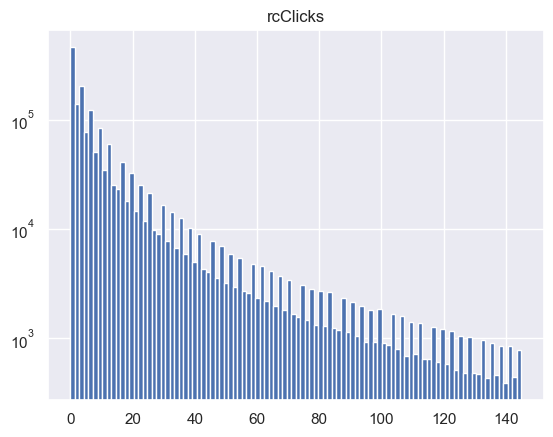

In [224]:
plt.figure(figsize=(10, 6))
combined_df.hist(column=['rcClicks'], bins= 100)
plt.yscale('log')


<Figure size 1000x600 with 0 Axes>

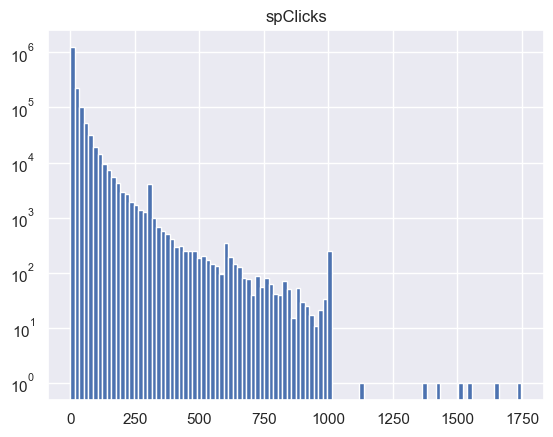

In [175]:
plt.figure(figsize=(10, 6))
combined_df.hist(column=['spClicks'], bins=100)
plt.yscale('log')


<Figure size 1000x600 with 0 Axes>

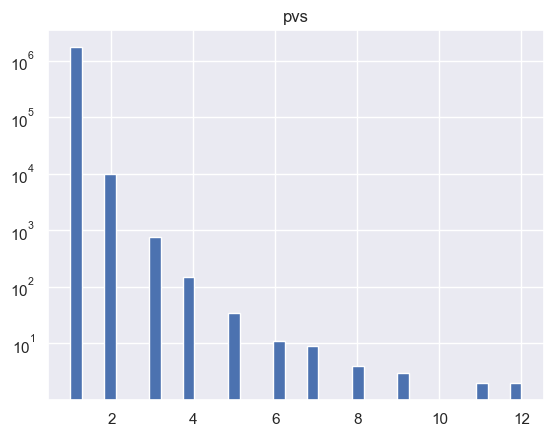

In [127]:
plt.figure(figsize=(10, 6))
combined_df.hist(column=['pvs'], bins=40)
plt.yscale('log')


In [223]:
combined_df["clicks"].value_counts()

0    1524509
1     167387
Name: clicks, dtype: int64

## handling outliers
In both spClicks and rcClicks there are clear outliers- a very small amount of samples with extremely large values.

In [176]:
z_score = zscore(combined_df['rcClicks'])

combined_df = combined_df[z_score <= 3.5]

<Figure size 1000x600 with 0 Axes>

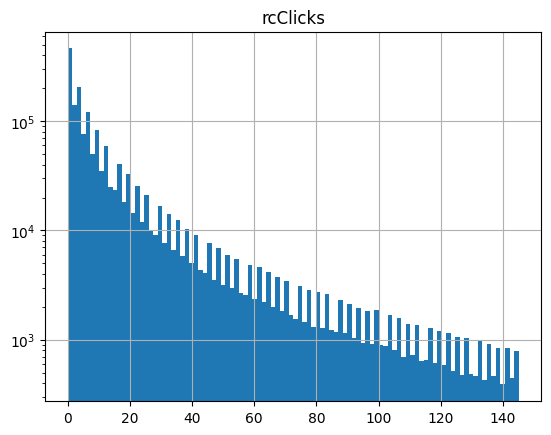

In [11]:
plt.figure(figsize=(10, 6))
combined_df.hist(column=['rcClicks'], bins= 100)
plt.yscale('log')


In [185]:
z_score_spClicks = zscore(combined_df['spClicks'])

combined_df = combined_df[z_score_spClicks <= 3.5]

<Figure size 1000x600 with 0 Axes>

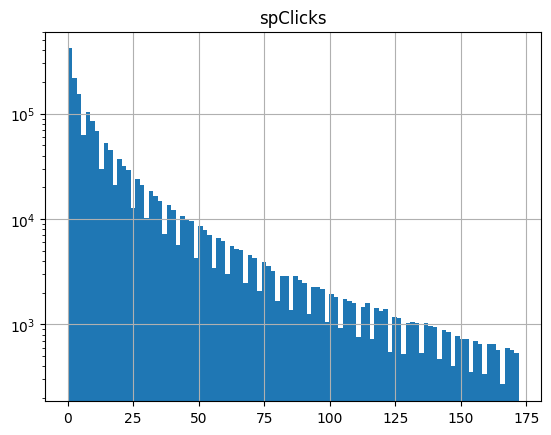

In [10]:
plt.figure(figsize=(10, 6))
combined_df.hist(column=['spClicks'], bins= 100)
plt.yscale('log')

# Limit Sparse Features

In [220]:
def limit_sparse_feature(feature_name, threshold):
    feature_counts = combined_df[feature_name].value_counts()

    values_to_replace = feature_counts[feature_counts < threshold].index

    combined_df[feature_name] = combined_df[feature_name].replace(values_to_replace, 'OTHER')


In [155]:
limit_sparse_feature("country", 10)

C:\Users\ofri\AppData\Local\Temp\ipykernel_2028\1593950919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[feature_name] = combined_df[feature_name].replace(values_to_replace, 'OTHER')


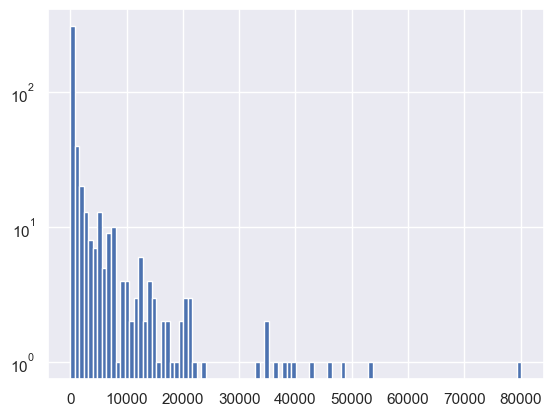

In [221]:
limit_sparse_feature('region', 20)
plt.figure()
region_value_counts = combined_df['region'].value_counts().values
plt.hist(region_value_counts, bins=100)
plt.yscale('log')

In [212]:
city_value_counts = combined_df['city'].value_counts()
sparse_values = city_value_counts[city_value_counts < 10].index
len(combined_df[combined_df['city'].isin(sparse_values)]) / len(combined_df)

Index(['bossoroca', 'algorta', 'petrosino', 'chabeuil', 'tibau do sul',
       'huttwil', 'kale', 'villabruna', 'sterling', 'beckdorf',
       ...
       'westborough', 'sainte-marie-du-mont', 'saulny', 'vernon hills', 'hode',
       'subotica', 'ljungby', 'serra da silveira', 'gerderest', 'sequals'],
      dtype='object', length=44344)


0.08721990004113728

# version

In [341]:
combined_df.to_csv("mid-processed-data.csv", index=False)

In [147]:
merged_df.to_csv("data+publisher-common-features-merged.csv", index=False)

In [16]:
combined_df = pd.read_csv("mid-processed-data.csv")

# Feature Engineering

In [17]:
combined_df["weekend"] = combined_df["date"].isin([20231230, 20231231, 20240105])
combined_df["weekend"] = combined_df["weekend"].astype('int32')

### create a merged data frame of top 5 common user feature for every feature

In [19]:
pub_com_country_users = pub_com_users[pub_com_users["feature"] == "COMMON_USER_COUNTRY"]
pub_com_region_users = pub_com_users[pub_com_users["feature"] == "COMMON_USER_REGION"]
pub_com_region_code_users = pub_com_users[pub_com_users["feature"] == "COMMON_USER_REGION_CODE"]
pub_com_city_users = pub_com_users[pub_com_users["feature"] == "COMMON_USER_CITY"]
pub_com_upp_tax_users = pub_com_users[pub_com_users["feature"] == "COMMON_USER_UPPER_TAXONOMY"]

In [20]:
pub_com_country_users = pub_com_country_users.add_suffix("_country")
pub_com_region_users = pub_com_region_users.add_suffix("_region")
pub_com_region_code_users = pub_com_region_code_users.add_suffix("_region_code")
pub_com_city_users = pub_com_city_users.add_suffix("_city")
pub_com_upp_tax_users = pub_com_upp_tax_users.add_suffix("_upp_tax")

In [21]:
merged_df_1 = pd.merge(combined_df, pub_com_country_users, left_on='publisherId', right_on='publisher_id_country', how='left')
merged_df_2 = pd.merge(merged_df_1, pub_com_region_users, left_on='publisherId', right_on='publisher_id_region', how='left')
merged_df_3 = pd.merge(merged_df_2, pub_com_region_code_users, left_on='publisherId', right_on='publisher_id_region_code', how='left')
merged_df_4 = pd.merge(merged_df_3, pub_com_city_users, left_on='publisherId', right_on='publisher_id_city', how='left')
merged_df = pd.merge(merged_df_4, pub_com_upp_tax_users, left_on='publisherId', right_on='publisher_id_upp_tax', how='left')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691896 entries, 0 to 1691895
Data columns (total 55 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   sourceItemId                            int64  
 1   itemId                                  int64  
 2   placement                               object 
 3   userId                                  object 
 4   publisherId                             object 
 5   publisherLanguage                       object 
 6   city                                    object 
 7   region                                  object 
 8   country                                 object 
 9   sessionReferrer                         object 
 10  userQualityLoyalty                      object 
 11  upperTaxonomy                           object 
 12  alchemyTaxonomy                         object 
 13  rcClicks                                float64
 14  spClicks                          

In [22]:
merged_df_copy = merged_df.copy()

### Calculate In Marketness

In [ ]:
merged_df["top_5_common_user_feature_city"] = merged_df["top_5_common_user_feature_city"].astype('str')
merged_df["top_5_common_user_feature_country"] = merged_df["top_5_common_user_feature_country"].astype('str')
merged_df["top_5_common_user_feature_region"] = merged_df["top_5_common_user_feature_region"].astype('str')
merged_df["top_5_common_user_feature_region_code"] = merged_df["top_5_common_user_feature_region_code"].astype('str')
merged_df["top_5_common_user_feature_upp_tax"] = merged_df["top_5_common_user_feature_upp_tax"].astype('str')

def in_city_condition(row):
    if row['city'] in row['top_5_common_user_feature_city']:
        return 1
    return 0

def in_country_condition(row):
    if row['country'] in row['top_5_common_user_feature_country']:
        return 1
    return 0

def in_region_condition(row):
    if row['region'] in row['top_5_common_user_feature_region'] or row['region'] in row['top_5_common_user_feature_region_code']:
        return 1
    return 0

merged_df['in_country_user'] = merged_df.apply(in_city_condition, axis=1)
merged_df['in_country_user'] = merged_df.apply(in_country_condition, axis=1)
merged_df['in_region_user'] = merged_df.apply(in_region_condition, axis=1)


In [23]:
merged_df_copy["top_5_common_user_feature_city"] = merged_df_copy["top_5_common_user_feature_city"].astype('str')
merged_df_copy["top_5_common_user_feature_country"] = merged_df_copy["top_5_common_user_feature_country"].astype('str')
merged_df_copy["top_5_common_user_feature_region"] = merged_df_copy["top_5_common_user_feature_region"].astype('str')
merged_df_copy["top_5_common_user_feature_region_code"] = merged_df_copy["top_5_common_user_feature_region_code"].astype('str')
merged_df_copy["top_5_common_user_feature_upp_tax"] = merged_df_copy["top_5_common_user_feature_upp_tax"].astype('str')

def calc_in_marketness(row):
    in_marketness = 0
    if row['country'] in row['top_5_common_user_feature_country']:
        in_marketness = in_marketness + 1
    if row['region'] in row['top_5_common_user_feature_region'] or row['region'] in row['top_5_common_user_feature_region_code']:
        in_marketness = in_marketness + 1
    if row['city'] in row['top_5_common_user_feature_city']:
        in_marketness = in_marketness + 1
    return in_marketness

merged_df_copy['in_market_user'] = merged_df_copy.apply(calc_in_marketness, axis=1)
merged_df_copy['in_market_user'].value_counts()


2    760001
1    636858
3    254209
0     40828
Name: in_market_user, dtype: int64

In [122]:
combined_df_2 = merged_df_copy.drop(pub_com_city_users.columns, axis=1)
combined_df_2 = combined_df_2.drop(pub_com_country_users.columns, axis=1)
combined_df_2 = combined_df_2.drop(pub_com_region_code_users.columns, axis=1)
combined_df_2 = combined_df_2.drop(pub_com_region_users.columns, axis=1)
combined_df_2 = combined_df_2.drop(pub_com_upp_tax_users.columns, axis=1)


# Building First Model

In [136]:
data = combined_df

### Split Train Test

In [137]:
labels = data['clicks']
data = data.drop('clicks', axis=1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, random_state=42)

### Create And Fit Model

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691896 entries, 0 to 1691895
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sourceItemId        int64  
 1   itemId              int64  
 2   placement           object 
 3   userId              object 
 4   publisherId         object 
 5   publisherLanguage   object 
 6   city                object 
 7   region              object 
 8   country             object 
 9   sessionReferrer     object 
 10  userQualityLoyalty  object 
 11  upperTaxonomy       object 
 12  alchemyTaxonomy     object 
 13  rcClicks            float64
 14  spClicks            float64
 15  date                int64  
 16  pvs                 int64  
 17  session_depth       int64  
 18  weekend             int32  
dtypes: float64(2), int32(1), int64(5), object(11)
memory usage: 238.8+ MB


In [140]:
model = CatBoostClassifier(depth=6,  learning_rate= 0.1, num_trees=100 , cat_features= ['placement', 'publisherLanguage', 'city', 'region', 'country', 'sessionReferrer', 'userQualityLoyalty', 'upperTaxonomy', 'alchemyTaxonomy', "userId", "publisherId", "sourceItemId", "itemId", "date", "weekend"])

In [141]:
model.fit(X_train, y_train)

0:	learn: 0.6314309	total: 1.31s	remaining: 2m 9s
1:	learn: 0.5811347	total: 2.54s	remaining: 2m 4s
2:	learn: 0.5393174	total: 3.65s	remaining: 1m 57s
3:	learn: 0.5047761	total: 4.59s	remaining: 1m 50s
4:	learn: 0.4754674	total: 5.68s	remaining: 1m 47s
5:	learn: 0.4506542	total: 6.9s	remaining: 1m 48s
6:	learn: 0.4296506	total: 8.04s	remaining: 1m 46s
7:	learn: 0.4118657	total: 9.33s	remaining: 1m 47s
8:	learn: 0.3966312	total: 10.4s	remaining: 1m 45s
9:	learn: 0.3836218	total: 11.5s	remaining: 1m 43s
10:	learn: 0.3725656	total: 12.4s	remaining: 1m 40s
11:	learn: 0.3629558	total: 13.4s	remaining: 1m 38s
12:	learn: 0.3549009	total: 14.5s	remaining: 1m 36s
13:	learn: 0.3479758	total: 15.5s	remaining: 1m 35s
14:	learn: 0.3420571	total: 16.6s	remaining: 1m 34s
15:	learn: 0.3369493	total: 17.7s	remaining: 1m 32s
16:	learn: 0.3324492	total: 18.6s	remaining: 1m 30s
17:	learn: 0.3286626	total: 19.5s	remaining: 1m 28s
18:	learn: 0.3253639	total: 20.5s	remaining: 1m 27s
19:	learn: 0.3226388	tota

In [142]:
y_pred = model.predict(X_test)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9011082215260949

100 trees, depth- 6 accuracy: 0.9010875347242745
100 trees, depth- 6, with im-market user: 0.9011377741001241
200 trees, depth- 6 accuracy: 0.901403747266387
200 trees, depth- 6, with im-market user: 0.9013475973757314


## Model V2

### Dropping Irrelevant Features

In [279]:
data_V2 = combined_df_v2.drop(['userId', 'publisherId', 'itemId', 'sourceItemId', 'date'], axis=1)
labels_V2 = data_V2['clicks']
data_V2 = data_V2.drop('clicks', axis=1)

### Split Train Test

In [281]:
X_train_V2, X_test_V2, y_train_V2, y_test_V2 = train_test_split(data_V2, labels_V2, test_size= 0.2, random_state=42)

### Create And Fit Model

In [299]:
cat_features_indices = ['placement', 'publisherLanguage', 'city', 'region', 'country', 'sessionReferrer', 'userQualityLoyalty', 'upperTaxonomy', 'alchemyTaxonomy']

In [304]:
model_V2 = CatBoostClassifier(iterations=30, depth=3, learning_rate= 0.1, cat_features= ['placement', 'publisherLanguage', 'city', 'region', 'country', 'sessionReferrer', 'userQualityLoyalty', 'upperTaxonomy', 'alchemyTaxonomy'])

In [305]:
model_V2.fit(X_train_V2, y_train_V2)

0:	learn: 0.6316216	total: 686ms	remaining: 19.9s
1:	learn: 0.5817498	total: 898ms	remaining: 12.6s
2:	learn: 0.5401440	total: 1.6s	remaining: 14.4s
3:	learn: 0.5055643	total: 1.97s	remaining: 12.8s
4:	learn: 0.4765570	total: 2.45s	remaining: 12.3s
5:	learn: 0.4521165	total: 2.72s	remaining: 10.9s
6:	learn: 0.4314439	total: 3.17s	remaining: 10.4s
7:	learn: 0.4139200	total: 3.52s	remaining: 9.68s
8:	learn: 0.3989454	total: 3.93s	remaining: 9.16s
9:	learn: 0.3862857	total: 4.35s	remaining: 8.7s
10:	learn: 0.3753567	total: 4.76s	remaining: 8.23s
11:	learn: 0.3659587	total: 5.3s	remaining: 7.95s
12:	learn: 0.3583830	total: 5.51s	remaining: 7.2s
13:	learn: 0.3515141	total: 5.95s	remaining: 6.8s
14:	learn: 0.3456411	total: 6.47s	remaining: 6.47s
15:	learn: 0.3406444	total: 6.89s	remaining: 6.03s
16:	learn: 0.3365242	total: 7.35s	remaining: 5.62s
17:	learn: 0.3328547	total: 7.77s	remaining: 5.18s
18:	learn: 0.3298238	total: 8.21s	remaining: 4.75s
19:	learn: 0.3272537	total: 8.56s	remaining: 4

In [306]:
y_pred_V2 = model_V2.predict(X_test_V2)


In [307]:
accuracy_V2 = accuracy_score(y_test_V2, y_pred_V2)
accuracy_V2

0.9010136532892015

## Visualize Feature Importance

In [144]:
feature_importance = model.get_feature_importance()
features = data.columns
for i, importance in enumerate(feature_importance):
    print(f"{features[i]}: Importance = {round(importance, 2)}")

sourceItemId: Importance = 5.42
itemId: Importance = 20.03
placement: Importance = 18.51
userId: Importance = 7.09
publisherId: Importance = 19.43
publisherLanguage: Importance = 0.76
city: Importance = 0.0
region: Importance = 0.01
country: Importance = 1.06
sessionReferrer: Importance = 0.16
userQualityLoyalty: Importance = 0.55
upperTaxonomy: Importance = 0.49
alchemyTaxonomy: Importance = 2.24
rcClicks: Importance = 22.47
spClicks: Importance = 0.67
date: Importance = 0.0
pvs: Importance = 0.21
session_depth: Importance = 0.88
weekend: Importance = 0.01


### feature importace with in market user feature:

sourceItemId: Importance = 3.88
itemId: Importance = 17.34
placement: Importance = 17.22
userId: Importance = 4.53
publisherId: Importance = 24.13
publisherLanguage: Importance = 0.85
city: Importance = 0.06
region: Importance = 0.05
country: Importance = 1.07
sessionReferrer: Importance = 0.28
userQualityLoyalty: Importance = 0.47
upperTaxonomy: Importance = 0.4
alchemyTaxonomy: Importance = 2.25
rcClicks: Importance = 25.32
spClicks: Importance = 1.15
date: Importance = 0.0
pvs: Importance = 0.24
session_depth: Importance = 0.74
weekend: Importance = 0.0
in_market_user: Importance = 0.0

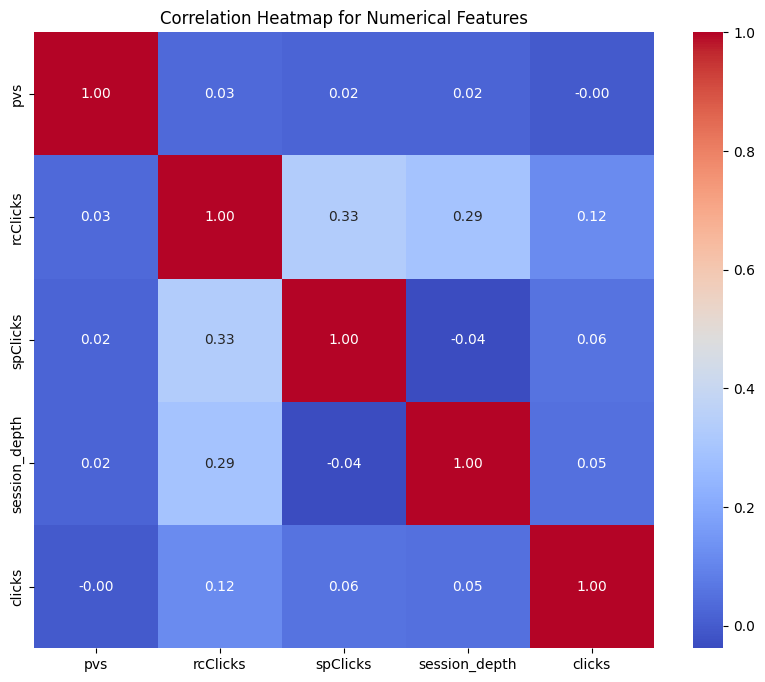

In [146]:
numerical_features = ["pvs", "rcClicks", "spClicks", "session_depth", "clicks"]
numerical_features_corr = combined_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Features')
plt.show()